## NB - binary classification

In [1506]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [1507]:
pp_train = pd.read_csv("pp_train.csv")
pp_test = pd.read_csv("pp_test.csv")

pp_class = pp_train.copy()
pp_test_class = pp_test.copy()

In [1508]:
pp_class.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

#### tolgo record con outliers 

In [1509]:
pp_class = pp_class[pp_class["outlier_w_type"] != True]
pp_test_class = pp_test_class[pp_test_class["outlier_w_type"] != True]

#### Filtro dataset su classi meno rappresentate -> capire se 1,5,6,9 o 7,8,9

In [1510]:
 #pp_class = pp_class[~pp_class['titleType_encoded'].isin([7,8, 9])]
## pp_test_class = pp_test_class[~pp_test_class['titleType_encoded'].isin([7,8, 9])]

### preprocessing variabili

In [1511]:
pp_class['canHaveEpisodes'] = pp_class['canHaveEpisodes'].astype(int)
pp_test_class['canHaveEpisodes'] = pp_test_class['canHaveEpisodes'].astype(int)

In [1512]:
column2drop = ['originalTitle', 'runtimeMinutes']
pp_class.drop(column2drop, axis=1, inplace=True)
pp_test_class.drop(column2drop, axis=1, inplace=True)

#### endYear da gestire

In [1513]:
pp_class= pp_class.drop(["endYear"], axis=1)
pp_test_class= pp_test_class.drop(["endYear"], axis=1)

#### Binarizzazione da capire

In [1514]:
#1 binarizzazione (0 / >0) per le variabili con tanti zeri (consigliato per NB)

pp_class['totalNominations_bin'] = (pp_class['totalNominations'] > 0).astype(int)
pp_class['totalMedia_bin'] = (pp_class['totalMedia'] > 0).astype(int)

pp_test_class['totalNominations_bin'] = (pp_test_class['totalNominations'] > 0).astype(int)
pp_test_class['totalMedia_bin'] = (pp_test_class['totalMedia'] > 0).astype(int)



#### altre binarizzazioni

In [1515]:
# #2 discretizzazione per fasce 
# #total media
# bins_tm = [-1, 0, 1, 8, 50, float('inf')]
# labels_tm = [0, 1, 2, 3, 4]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['totalMedia_bin'] = pd.cut(pp_class['totalMedia'], bins=bins_tm, labels=labels_tm, right=False)
# pp_test_class['totalMedia_bin'] = pd.cut(pp_test_class['totalMedia'], bins=bins_tm, labels=labels_tm, right=False)

# #total nom
# bins_tnom = [-1, 0, 2, 10,  float('inf')]
# labels_tnom = [0, 1, 2, 3]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['totalNominations_bin'] = pd.cut(pp_class['totalNominations'], bins=bins_tnom, labels=labels_tnom, right=False)
# pp_test_class['totalNominations_bin'] = pd.cut(pp_test_class['totalNominations'], bins=bins_tnom, labels=labels_tnom, right=False)

# # # Assicurati che le nuove colonne siano di tipo numerico
# pp_class['totalNominations_bin'] = pp_class['totalNominations_bin'].astype(int)
# pp_test_class['totalNominations_bin'] = pp_test_class['totalNominations_bin'].astype(int)

# pp_class['totalMedia_bin'] = pp_class['totalMedia_bin'].astype(int)
# pp_test_class['totalMedia_bin'] = pp_test_class['totalMedia_bin'].astype(int)


In [1516]:
#0>0
# pp_class['awardWins_bin'] = (pp_class['awardWins'] > 0).astype(int)
# pp_class['totalVideos_bin'] = (pp_class['totalVideos'] > 0).astype(int)
# pp_class['awardNominationsExcludeWins_bin'] = (pp_class['awardNominationsExcludeWins'] > 0).astype(int)


# pp_test_class['awardWins_bin'] = (pp_test_class['awardWins'] > 0).astype(int)
# pp_test_class['totalVideos_bin'] = (pp_test_class['totalVideos'] > 0).astype(int)
# pp_test_class['awardNominationsExcludeWins_bin'] = (pp_test_class['awardNominationsExcludeWins'] > 0).astype(int)

#FASCE
# bins_awards = [0, 1, 10, float('inf')]
# labels_awards = [0, 1, 2]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['awardWins_bin'] = pd.cut(pp_class['awardWins'], bins=bins_awards, labels=labels_awards, right=False)
# ## pp_test_class['awardWins_bin'] = pd.cut(pp_test_class['awardWins'], bins=bins_awards, labels=labels_awards, right=False)



# bins_videos = [0, 1, 6, float('inf')]
# labels_videos = [0, 1, 2]
# pp_class['totalVideos_bin'] = pd.cut(pp_class['totalVideos'], bins=bins_videos, labels=labels_videos, right=False)
# ## pp_test_class['totalVideos_bin'] = pd.cut(pp_test_class['totalVideos'], bins=bins_videos, labels=labels_videos, right=False)



# bins_nom = [0, 1, 5, float('inf')]
# labels_nom = [0, 1, 2]
# pp_class['awardNominationsExcludeWins_bin'] = pd.cut(pp_class['awardNominationsExcludeWins'], 
#                                                     bins=bins_nom, 
#                                                     labels=labels_nom, 
#                                                     right=False)
# ## pp_test_class['awardNominationsExcludeWins_bin'] = pd.cut(pp_train_class['awardNominationsExcludeWins'], 
# #                                                    bins=bins_nom, 
# #                                                    labels=labels_nom, 
# #                                                    right=False)



# # Assicurati che le nuove colonne siano di tipo numerico
# pp_class['awardWins_bin'] = pp_class['awardWins_bin'].astype(int)
# pp_class['totalVideos_bin'] = pp_class['totalVideos_bin'].astype(int)
# pp_class['awardNominationsExcludeWins_bin'] = pp_class['awardNominationsExcludeWins_bin'].astype(int)

# ## pp_test_class['awardWins_bin'] = pp_test_class['awardWins_bin'].astype(int)
# ## pp_test_class['totalVideos_bin'] = pp_test_class['totalVideos_bin'].astype(int)
# ## pp_test_class['awardNominationsExcludeWins_bin'] = pp_test_class['awardNominationsExcludeWins_bin'].astype(int)


#### encoding title type

In [1517]:
# from sklearn.preprocessing import OneHotEncoder

# # Estrai la colonna da codificare
# title_type = pp_class[['titleType']]
# title_type_test = pp_test_class[['titleType']]

# # Inizializza l'encoder
# encoder = OneHotEncoder(sparse=False, drop=None)  # drop='first' se vuoi evitare collinearità

# # Esegui la codifica
# title_encoded = encoder.fit_transform(title_type)
# title_encoded_test = encoder.transform(title_type_test)

# # Crea un DataFrame con i nomi delle colonne
# title_encoded_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(['titleType']))
# title_encoded_df_test = pd.DataFrame(title_encoded_test, columns=encoder.get_feature_names_out(['titleType']))


# # Unisci al dataset originale
# pp_class= pd.concat([pp_class.reset_index(drop=True), title_encoded_df], axis=1)
# pp_test_class= pd.concat([pp_test_class.reset_index(drop=True), title_encoded_df_test], axis=1)


# # (Facoltativo) Rimuovi la colonna originale
# pp_class#.drop(columns=['titleType'], inplace=True)


# "lowEngagement"

#### Creation of the target variable

In [1518]:
pp_class["has_lowEngagement"] = (pp_class["numVotes"]<100).astype(int)
pp_test_class["has_lowEngagement"] = (pp_test_class["numVotes"]<100).astype(int)

In [1519]:
x = sum(pp_class["has_lowEngagement"] == 1)
x

10287

#### Selezione variabile target

In [1520]:
y_train = np.array(pp_class["has_lowEngagement"]) #target originale
y_test = np.array(pp_test_class["has_lowEngagement"])

#### One hot encoding titletype

In [1521]:
title_type_dummies_tr = pd.get_dummies(pp_class['titleType'], prefix='titleType')
title_type_dummies_ts = pd.get_dummies(pp_test_class['titleType'], prefix='titleType')

pp_class = pd.concat([pp_class, title_type_dummies_tr], axis=1)
pp_test_class = pd.concat([pp_test_class, title_type_dummies_ts], axis=1)

#### Selezione attributi per classificazione
capire 1he titletpe -> ha 0.0 come valore, mi sa che è sbagliato codice

In [1522]:
num_cols = [
       'rating',
       'totalCredits', 
       'canHaveEpisodes', 
       'numRegions', 
       'fill_runtimeMinutes_Bruno',  
       'totalNominations_bin',
       'totalMedia_bin',
       'startYear',
       'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_EU', 
       #'countryOfOrigin_AF','countryOfOrigin_AS', 'countryOfOrigin_OC','countryOfOrigin_SA', # predice meglio classe 0, ma si abbassa di 1.5 la accuracy
       #'countryOfOrigin_UNK',

       #'criticReviewsTotal', # FORSEEEE toglere perchè simili
       #'userReviewsTotal', # toglirtr perchè simile
       ]

# NO DISTRIBUZIONE GAUSSIANA
# aumenta accuratezza di 1.5 ma predice peggio classe 0
one_hot_cols = [
    # 'titleType_movie', 'titleType_short', 'titleType_tvEpisode', 'titleType_tvMiniSeries',
    # 'titleType_tvMovie', 'titleType_tvSeries', 'titleType_tvSpecial', 'titleType_video'
]

In [1523]:
#studio variabili da usare

# X_train = pp_class[[
#        'rating',
#        #'startYear',  
#        'totalCredits',  
#        'criticReviewsTotal', # FORSEEEE toglere perchè simili
#        ##'canHaveEpisodes', 
#        ##'isAdult',  -> era simie
#        'numRegions', 
#        'userReviewsTotal', # toglirtr perchè simile
#        ##'endYear',
#        #'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',  'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror','is_Animation', 
#        #'fill_runtimeMinutes',  #lasciare
#        #'is_from_Oceania','is_from_North America', 'is_from_South America', 'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 
#        ##'awardWins_bin',  
#        ##'totalVideos_bin', 
#        ##'awardNominationsExcludeWins_bin', 

#        #'countryOfOrigin', 
#        'countryOfOrigin_freq_enc',
#        #'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA','countryOfOrigin_UNK', 
#        'fill_runtimeMinutes_Bruno',  
#        #'totalNominations',
#        #'totalMedia', 
#        'totalNominations_bin',
#       # 'totalMedia_bin',
#       # 'runtimeMinutes_notitletype' 
#        ]].values

# ## X_test = pp_test_class[[ ]].values

In [1524]:
# --- Scaler ---
scaler = StandardScaler()
X_train_scaled_num = pd.DataFrame(
    scaler.fit_transform(pp_class[num_cols]),
    columns=num_cols,
    index=pp_class.index
)
X_test_scaled_num = pd.DataFrame(
    scaler.transform(pp_test_class[num_cols]),
    columns=num_cols,
    index=pp_test_class.index
)

# --- Mantieni le one-hot invariate ---
X_train_onehot = pp_class[one_hot_cols]
X_test_onehot = pp_test_class[one_hot_cols]

# --- Unisci ---
X_train_temp = pd.concat([X_train_scaled_num, X_train_onehot], axis=1)
X_test_temp = pd.concat([X_test_scaled_num, X_test_onehot], axis=1)

# --- Ricostruisci l'ordine originale delle colonne ---
original_cols = [col for col in pp_class.columns if col in num_cols + one_hot_cols]

X_train_tr = X_train_temp[original_cols]
X_test_tr = X_test_temp[original_cols]

Splitting in train-validation

In [1525]:
X_train2_tr, X_val_tr, y_train2, y_val = train_test_split(
     X_train_tr, y_train, test_size=0.2, random_state=32)

normalizzazione

In [1526]:
# X_train2_log = np.log1p(X_train2)
# X_val_log= np.log1p(X_val)

# X_train_log = np.log1p(X_train)
# X_test_log = np.log1p(X_test)

In [1527]:

# standardsc = StandardScaler()

#         # # Fitta e trasforma il training set in un solo passaggio
# X_train2_standardsc = standardsc.fit_transform(X_train2_log)
# X_val_standardsc = standardsc.fit_transform(X_val_log)

# X_train_standardsc = standardsc.fit_transform(X_train_log)
#         # # Trasforma il test set (senza rifittare!)
# X_test_standardsc = standardsc.transform(X_test_log)

In [1528]:
# minmax = MinMaxScaler()

        ## Fitta e trasforma il training set in un solo passaggio
# X_train2_minmax = minmax.fit_transform(X_train2_log)
# X_val_minmax = minmax.fit_transform(X_val_log)

## X_train_minmax = minmax.fit_transform(X_train_log)
        # # Trasforma il test set (senza rifittare!)
# #X_test_minmax = minmax.transform(X_test)

In [1529]:
# X_train2_tr = X_train2_standardsc
# X_val_tr = X_val_standardsc

# X_train_tr = X_train_standardsc
# X_test_tr = X_test_standardsc

## Naive Bayes

In [1530]:
clf = GaussianNB()
#clf = ComplementNB(alpha=1.0) #-> non va perchè ci sono valori negativi
clf.fit(X_train2_tr, y_train2)

GaussianNB()

Prediction on validation set

In [1531]:
y_pred = clf.predict(X_val_tr)

In [1532]:
print(len(y_pred))  # dovrebbe stampare lo stesso numero in entrambi
print(len(y_val))  

2991
2991


In [1533]:
print(f"Test accuracy: {accuracy_score(y_val, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Test accuracy: 0.7903711133400201

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       938
           1       0.80      0.92      0.86      2053

    accuracy                           0.79      2991
   macro avg       0.77      0.71      0.73      2991
weighted avg       0.78      0.79      0.78      2991



In [1534]:
clf.predict_proba(X_val_tr)
#prob che un record appartenga alle classi

array([[0.12365308, 0.87634692],
       [0.02086867, 0.97913133],
       [0.31059706, 0.68940294],
       ...,
       [0.03129053, 0.96870947],
       [0.01141406, 0.98858594],
       [0.3721108 , 0.6278892 ]])

Performance sul Training set:
Accuracy: 0.7882
F1 Score: 0.7722

Performance sul Validation set:
Accuracy: 0.7904
F1 Score: 0.7769


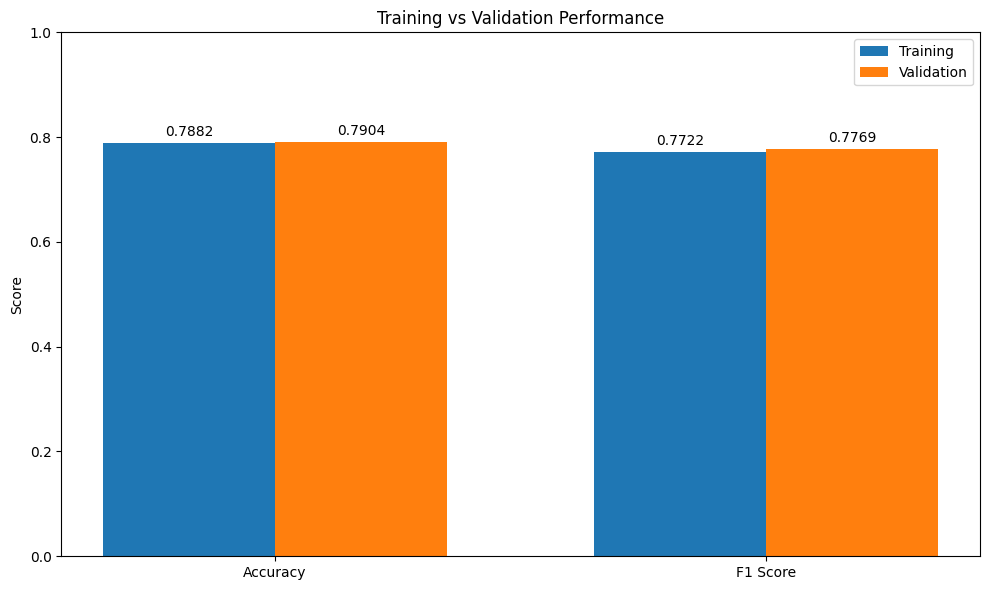

In [1535]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train2_tr)
train_accuracy = accuracy_score(y_train2, y_pred_train)
train_f1 = f1_score(y_train2, y_pred_train, average='weighted')

# Valutazione sul validation set
y_pred_val = clf.predict(X_val_tr)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val, average='weighted')

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul Validation set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
val_scores = [val_accuracy, val_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, val_scores, width, label='Validation')

ax.set_ylabel('Score')
ax.set_title('Training vs Validation Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

ROC curve

In [1536]:
# plot_roc(y_val, clf.predict_proba(X_val_tr))
# plt.show()
# print(roc_auc_score(y_val, clf.predict_proba(X_val_tr), multi_class="ovr", average="macro"))

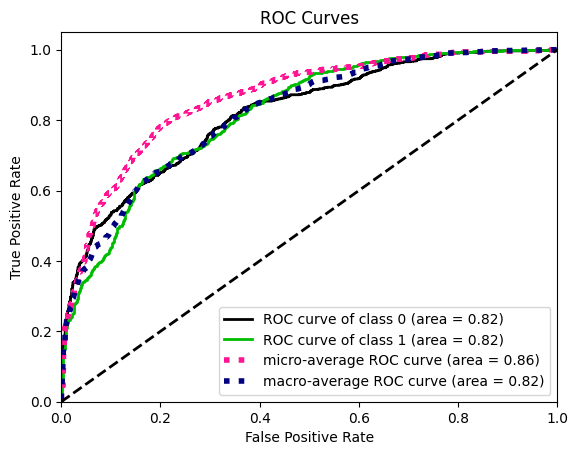

0.8181630294010429


In [1537]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_val_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_val, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_val, probs[:, 1]))

Confusion matrix

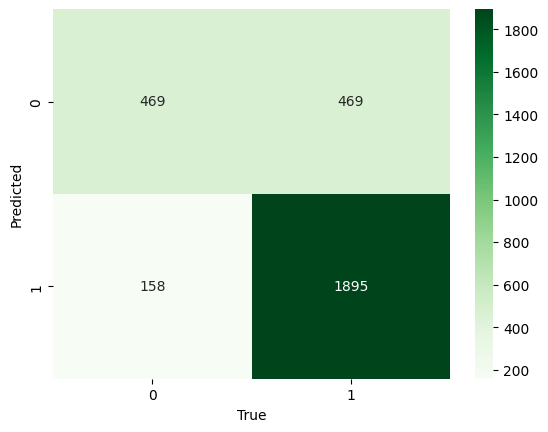

In [1538]:
classes_unique = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Prediction on the test set

In [1539]:
clf = GaussianNB()
# clf = ComplementNB()
clf.fit(X_train_tr, y_train)
y_pred = clf.predict(X_test_tr)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

Performance sul Training set:
Accuracy: 0.7900
F1 Score: 0.7711

Performance sul test set:
Accuracy: 0.7896
F1 Score: 0.7724


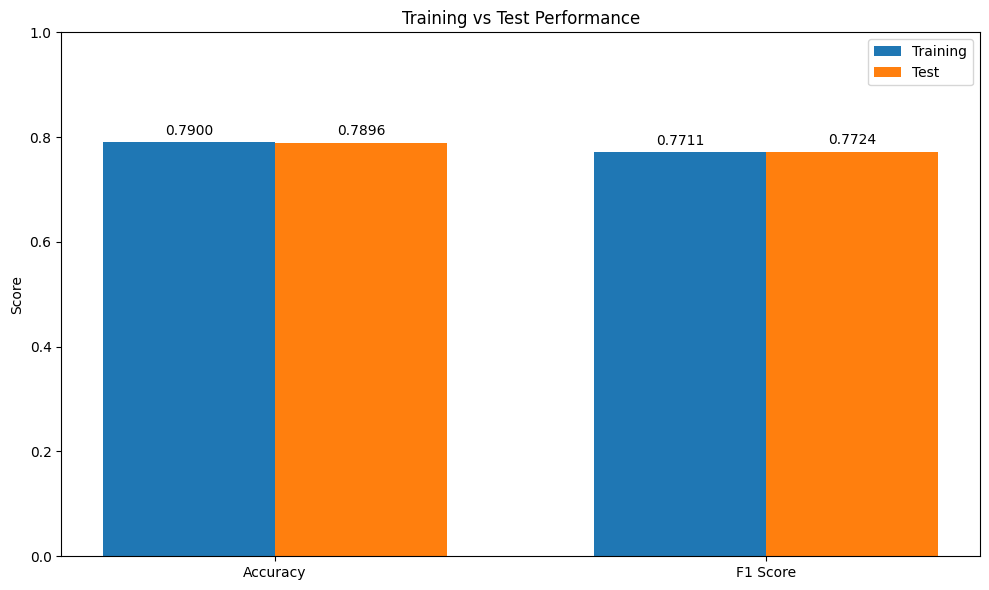

In [1540]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

# Valutazione sul test set
y_pred_test = clf.predict(X_test_tr)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
                        ### gaia ha messo y_tpred

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul test set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
test_scores = [test_accuracy, test_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### risultati test

In [1541]:
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.7896323086196504

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.47      0.58      1561
           1       0.79      0.94      0.86      3416

    accuracy                           0.79      4977
   macro avg       0.78      0.70      0.72      4977
weighted avg       0.79      0.79      0.77      4977



In [1542]:
clf.predict_proba(X_test_tr)
#prob che un record appartenga alle classi

array([[3.67253543e-02, 9.63274646e-01],
       [4.30716520e-02, 9.56928348e-01],
       [6.83763937e-02, 9.31623606e-01],
       ...,
       [2.25520386e-02, 9.77447961e-01],
       [1.00000000e+00, 1.06785897e-63],
       [6.74357514e-03, 9.93256425e-01]])

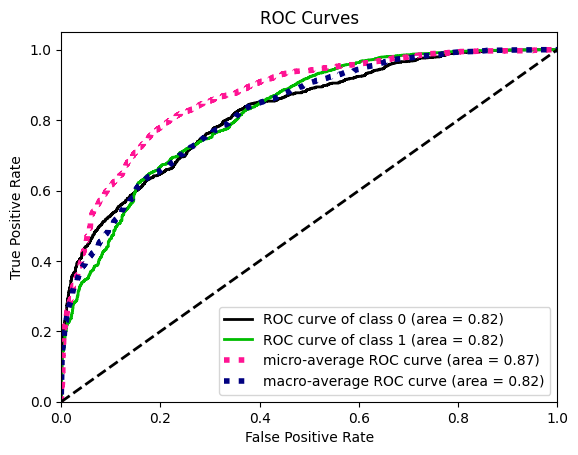

0.822367364942007


In [1543]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_test_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_test, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_test, probs[:, 1]))

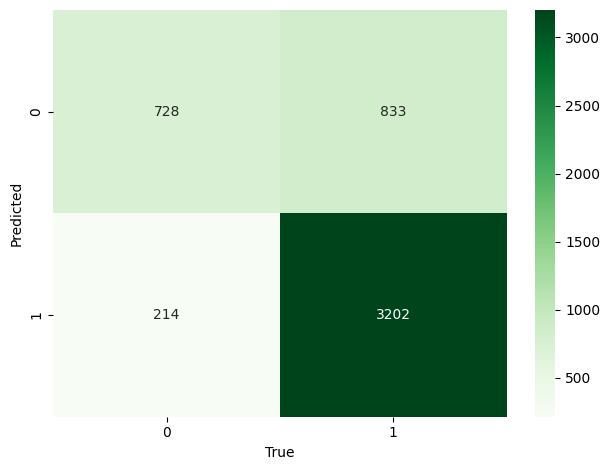

In [1544]:
classes_unique = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

## Dummy classifier -> cambia qlcs?

In [1545]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create dummy classifier (most frequent class strategy)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_tr, y_train)

# Predict and evaluate
y_pred = dummy.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6863572433192686
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1561
           1       0.69      1.00      0.81      3416

    accuracy                           0.69      4977
   macro avg       0.34      0.50      0.41      4977
weighted avg       0.47      0.69      0.56      4977



C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
